# Sprint 3: Consumer Complaint Database

Groep 10: Lucas Van de Velde, Thomas Devriese, Wouter Stemgée

## Introduction

Tijdens deze laatste sprint beginnen we vanuit een centrale onderzoeksvraag en trachten we deze zo goed mogelijk te beantwoorden door gebruik te maken van verschillende machine learning technieken. De eerste stap is om deze vraag te definiëren en vervolgens de predictors te gaan bepalen waarmee we het antwoord op deze vraag kunnen beantwoorden.

## Research Question

**"Kunnen we de reactie op een gegeven klacht gaan voorspellen?"**

Deze centrale onderzoeksvraag probeert te voorspellen hoe een bedrijf op een ongeziene klacht gaat reageren. Om dit te kunnen beantwoorden moeten we enkele onderliggen vragen stellen die invloed kunnen hebben op het eindresultaat. We gaan dus opzoek naar verschillende parameters die dit resultaat kunnen voorspellen.

Onderliggende vragen:
- "Heeft de sentiment van een klacht invloed op de reactie van het bedrijf?"
- "Heeft de historische ratio waarmee een klacht opgelost geraakt in verhouding met het totaal aantal klachten van het bedrijf invloed op de reactie van het bedrijf?"
- "Heeft de geolocatie van waar de klacht afkomstig is invloed op de reactie van het bedrijf?"
- "Heeft de productcategorie van de klacht invloed op de reactie van het bedrijf?"

De verschillende antwoorden op deze vragen worden vervolgens gebruikt als input om aan de hand van machine learning een classificatie model te ontwikkelen die de centrale onderzoeksvraag tracht te beantwoorden.

## Exploratory Data Analysis & Data Preprocessing

Hier gaan we gaan onderzoeken welke features in de dataset interessant kunnen zijn om te gebruiken. We bekijken of er een verband is tussen de antwoorden op de gestelde onderliggende vragen van hierboven en het uiteindelijke antwoord op de centrale onderzoeksvraag die we wensen te bekomen.

### Dataset

We starten zoals gewoonlijk met het inlezen van de volledige dataset.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

complaints_source_df = pd.read_csv('../data/complaints.csv', delimiter=',')
complaints_source_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


Vervolgens gaan we enkel de features die we wensen te gebruiken gaan kopiëren naar een nieuwe DataFrame en geven deze een eenvoudiger label.

In [71]:
complaints_df = complaints_source_df[['Product', 'Consumer complaint narrative', 'Company', 'State', 'Company response to consumer']].copy()
complaints_df.columns = ['Product', 'Narrative', 'Company', 'State', 'Response'] 
complaints_df.head()

,Product,Narrative,Company,State,Response
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation


### Features

Voor een aantal features gaan we nu gaan onderzoeken of deze relevant zijn voor het oplossen van de centrale onderzoeksvraag. We gaan ook gaan kijken welke processing nodig is voor elke feature om de onderliggende vragen te kunnen gaan beantwoorden. We trachten dit aan te tonen met meerdere visualisaties.

#### Response

De response stelt de reactie voor van het bedrijf op een gegeven klacht. Dit wordt de target van ons classificatie model die de centrale onderzoeksvraag zal beantwoorden. We stellen echter vast dat er enkele responscategorieën amper klachten bevatten. Om een beter classificatie model te kunnen bekomen gaan we daarom enkele categorieën die amper data bevatten gaan elimineren.

Aantal responsen: 7


<Figure size 720x360 with 0 Axes>

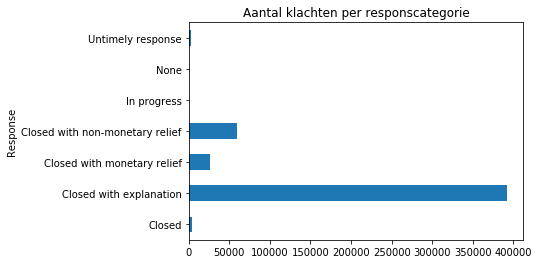

In [74]:
print('Aantal responsen:', len(complaints_df.Response.unique()))
fig = plt.figure(figsize=(10, 5))
pd.DataFrame({'Count': complaints_df.groupby(['Response']).size()}).plot.barh(title="Aantal klachten per responscategorie", legend=None)

In [75]:
complaints_df.replace({'Response': {'Closed': 'Closed without explanation'}}, inplace= True)
complaints_df = complaints_df[complaints_df['Response'].isin(['Closed with non-monetary relief', 'Closed with monetary relief', 'Closed with explanation', 'Closed without explanation'])]

Aantal responsen: 4


<Figure size 720x360 with 0 Axes>

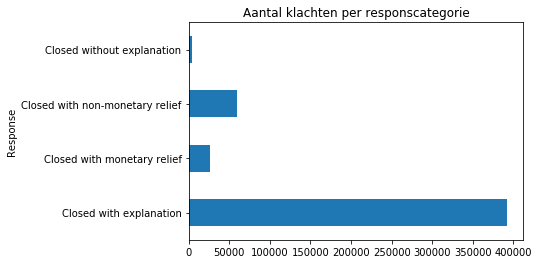

In [77]:
print('Aantal responsen:', len(complaints_df.Response.unique())) 
fig = plt.figure(figsize=(10, 5))
pd.DataFrame({'Count': complaints_df.groupby(['Response']).size()}).plot.barh(title="Aantal klachten per responscategorie", legend=None)

Vervolgens valt het ook op dat de data zeer **ongebalanceerd is**. Eventueel kunnen we de data gaan balanceren indien de het classificatie model hier niet goed op zou werken. We zullen het model zowel op de ongebalanceerde als op de gebalanceerde dataset trainen en kijken wat de beste resultaten geeft. Indien dit niet zou werken kunnen we ook nog proberen om de kleinere categorieën een **zwaarder gewicht** te geven ten opzichte van de grotere categorieën tijdens het trainen.

In [78]:
def sampling_k_elements(category, k=120000):
    if len(category) < k:
        return category
    return category.sample(k)

complaints_balanced_df = complaints_df.groupby('Response').apply(sampling_k_elements).reset_index(drop=True)

Aantal responsen: 4


<Figure size 720x360 with 0 Axes>

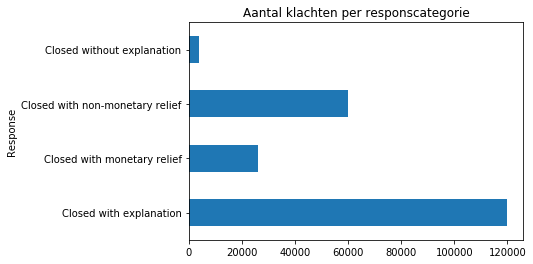

In [154]:
print('Aantal responsen:', len(complaints_balanced_df.Response.unique()))
fig = plt.figure(figsize=(10, 5))
pd.DataFrame({'Count': complaints_balanced_df.groupby(['Response']).size()}).plot.barh(title="Aantal klachten per responscategorie", legend=None)

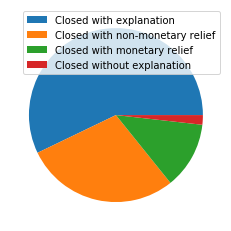

In [161]:
labels = complaints_balanced_df['Response'].value_counts().index
sizes = complaints_balanced_df['Response'].value_counts().values
patches, texts = plt.pie(sizes)
plt.legend(patches, labels)
plt.show()

#### Product

De eerste feature is de product categorie van de klacht. Zoals in de vorige sprints nemen we opnieuw alle klachten uit sterk gerelateerde product categorieën samen binnen overkoepelende product categorieën.

In [72]:
complaints_df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

Aantal product categorieën: 13


<Figure size 720x360 with 0 Axes>

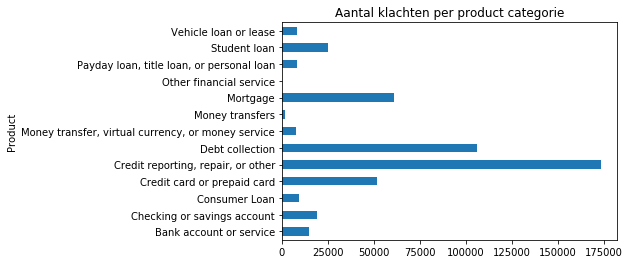

In [73]:
product_count = len(complaints_df.Product.unique())
print('Aantal product categorieën:', product_count)
product_counts = pd.DataFrame({'Count': complaints_df.groupby(['Product']).size()})
fig = plt.figure(figsize=(10, 5))
product_counts.plot.barh(title="Aantal klachten per product categorie", legend=None)

Deze data is ongebalanceerd, maar aangezien we in deze sprint geen classificatie gaan doen tussen de verschillende product categorieën is het niet zinvol om dit te gaan balanceren. Deze feature wordt hier nu louter beschouwd als categorische data.

Vervolgens gaan we onderzoeken of het zinvol is om de product categorie in rekening te brengen bij het voorspellen van de responsen van de bedrijven. Dit doen we door per product categorie de verdeling van de verschillende reacties te gaan visualiseren.

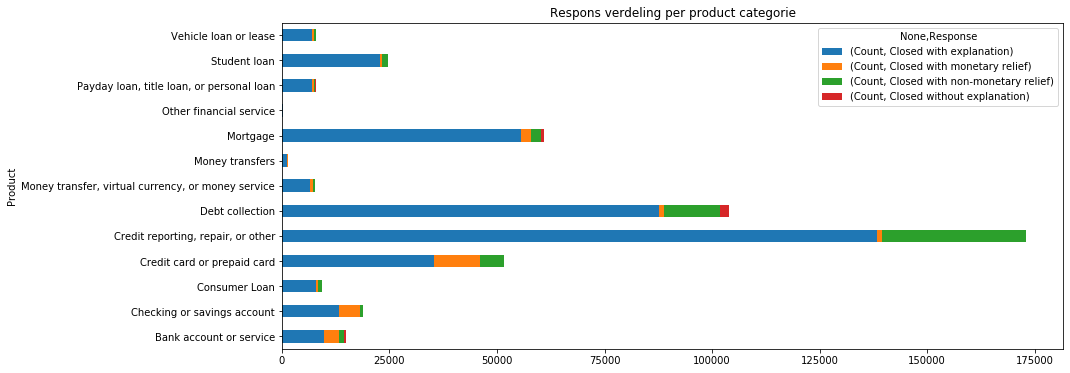

In [141]:
product_response_counts = pd.DataFrame({'Count': complaints_df.groupby(['Product', 'Response']).size()})
product_response_counts.unstack().plot(kind='barh', figsize=(14,6), stacked=True, title="Respons verdeling per product categorie")

Een aantal zaken vallen ons op bij het bestuderen van deze grafiek:
- Er zijn slechts 3 categorieën waarbij het respons "Closed without explanation" voorkomt, namelijk: "Mortgage", "Debt collection" en "Bank account or service"
- Bij de categorie "Credit card or prepaid card" is de verhouding waarmee de reactie "Closed with monetary relief" voorkomt veel groter dan bij de overige product categorieën
- Elke product categorie heeft over het algemeen een redelijk gelijklopende verdeling over de verschillende responses
- De grootste respons categorie "Closed with explanation" is over alle product categorieën heen steeds de grootste

Het lijkt ons dus wel interessant om de product categorie op te nemen in het classificatie model aangezien hier toch waarschijnlijk enkele verbanden in de data te vinden zijn.

#### Consumer complaint narrative

De tweede feature is de consumer complaint narrative. Voor elke klacht wordt de narrative gebruikt als een document in de vorm van tekstuele data. Deze documenten wensen we te gebruiken om een sentiment analyse uit te voeren en zo de eerste onderliggende vraag te gaan beantwoorden. Om dit mogelijk te maken gaan we net zoals in de vorige sprints heel wat processing gaan uitvoeren op deze documenten.

We gaan als volgt te werk:
1. alle woorden omvormen naar lowercase
2. alle symbolen, cijfers, URL's en whitespace/newlines verwijderen
3. alle symbolen ("XXX") die afkomstig zijn van anonimiseren van de data (kredietkaart gegevens) verwijderen
4. document opsplitsen in verschillende tokens
5. stopwoorden en woorden korter dan 3 karakters verwijderen
6. woorden omvormen naar stamvorm en lemmatisering toepassen met behulp van de nltk library

Dit proces is dus volledig analoog als bij onze vorige sprints.

In [5]:
# pip install nltk

In [6]:
import nltk, re
nltk.download('wordnet')

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

def processing(string):
    string = string.lower()
    string = re.sub(r'@\S+|https?:\S+|http?:\S', ' ', string)
    string = re.sub(r'[^A-Za-z0-9]+', ' ', string)
    string = re.sub(r'[^\w\s]', '', string)
    string = re.sub(r'[0-9]|,', '', string)
    string = string.replace(r'\r', ' ')
    string = string.replace(r'\n', ' ')
    string = re.sub(r'[X|x]{2,}', ' ', string)
    tokens = string.split(' ')
    tokens = [w for w in tokens if w not in ENGLISH_STOP_WORDS and len(w) > 2]
    result = [SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(token, pos='v')) for token in tokens]
    return ' ' . join(result)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\woute\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Vervolgens gaan we de processing toepassen met ondersteuning voor multithreading. Hiervoor maken we gebruik van de swifter library. Op die manier wordt de processing in parallele batches uitgevoerd die deze stap wat versnelt. De uitvoer van deze processing wordt opgeslagen in een nieuwe kolom met label 'Narrative_Processed'. **We zullen later bepalen of het gunstig is om de processed narrative te gebruiken in plaats van de oorspronkelijke narrative bij het testen van ons uiteindelijke classificatie model**.

In [7]:
# pip install swifter

In [8]:
%%time

import swifter

complaints_df['Narrative_Processed'] = complaints_df['Narrative'].swifter.apply(processing)


Wall time: 11min 24s


In [9]:
complaints_df[['Narrative', 'Narrative_Processed']].head()

,Narrative,Narrative_Processed
0,I have complained many times that the credit r...,complain time credit report experian inaccur j...
1,please review the current fraud account and al...,review current fraud account fraudul inquir
2,Called multiple times over the years for a deb...,call multipl time year debt occur previous mar...
3,I sent in a letter to the company to have them...,send letter compani valid debt special ask att...
4,On XX/XX/19 I applied for a Debt Relief Produc...,appli debt relief product account execut expla...


#### Company

TODO Thomas: ratio berekenen voor elk bedrijf
- verhouding soorten reacties van bedrijf ten opzichte van het totaal aantal klachten van dat bedrijf
- dit visualiseren
- een ratio parameter genereren per klacht om te gebruiken als invoer voor het classificatie model

In [10]:
company_count = len(complaints_df.Company.unique())
print('Aantal bedrijven:', company_count)

complaints_df.Company.unique()

Aantal bedrijven: 4419


array(['Experian Information Solutions Inc.',
       'Ideal Collection Services, Inc.',
       'ONEMAIN FINANCIAL HOLDINGS, LLC.', ..., 'Homes By Hunt LLC',
       'Maxitransfers Corporation', 'Reliable Auto Finance, Inc.'],
      dtype=object)

#### State

TODO Lucas: invloed geografische oorsprong van klacht
- verschillende states die dicht bij elkaar nemen onder eenzelfde regio definiëren
- plotten voor elke regio welke reacties er voorkomen en hieruit een conclusie trekken of er een significante correlatie is tussen de regio en de reactie van bedrijven

## Extended Feature Extraction

Aangezien we een predictor wensen te gebruiken die niet rechtstreeks uit de dataset te bekomen is, moeten we hier dus nog een aanvullende feature extraction gaan uitvoeren. De predictor die we wensen te bekomen uit de eerste onderliggende vraag is de sentiment score van elke klacht. Dit gaan we bekomen door een sentiment analyse over de hele dataset uit te voeren.

### Sentiment Analysis

Om een sentiment analyse te kunnen doen, hebben we een dataset nodig die tekstuele data bevat en waarvan elk document gelabeld is volgens de polariteit van de sentiment. Hiervoor maken we gebruik van een grote dataset die een verzameling is van 1.6M Twitter berichten. Deze tweets zijn gelabeld volgens sentiment. Vervolgens kunnen we een model trainen die dan gebruikt kan worden om voor elke klacht in de consumer complaint database een sentiment score te gaan bepalen.

Deze dataset hebben we verkregen via de website van Sentiment140. Deze dataset mag gebruikt worden op voorwaarde dat de originele bron vermeld wordt.

Dataset: http://help.sentiment140.com/for-students/

#### Data Exploration - Twitter Sentiment Analysis Dataset

Om de dataset te gaan gebruiken moeten we deze eerst gaan verkennen.

De dataset bevat 6 features:
- **target**: de polariteit van de tweet (0 = negatief, 4 = positief)
- **ids**: de index van the tweet (0 - 1599999)
- **date**: de datum van de tweet (Formaat: Sat May 16 23:58:44 UTC 2009)
- **flag**: de query van de tweet, indien er geen query is staat er 'NO_QUERY'
- **user**: de gebruiker die de tweet geschreven heeft
- **text**: de tekst van de tweet

Voor ons zijn enkel de 'target' en 'text' features van belang. We gaan deze dus gaan selecteren om hierop verder te werken.

In [12]:
filename = "../data/sentiment_analysis/input/twitter_dataset.csv"
twitter_source_df = pd.read_csv(filename, encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])

In [13]:
print("Twitter dataset grootte:", twitter_source_df.shape)

Twitter dataset grootte: (1600000, 6)


In [14]:
twitter_source_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
twitter_df = twitter_source_df[['target', 'text']].copy()
twitter_df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


Om de betekenis van de target beter te benadrukken vervangen we deze door de bijpassend sentiment:
- 0 = NEGATIVE
- 4 = POSITIVE

In [16]:
decode_map = {0: "NEGATIVE", 4: "POSITIVE"}

def decode_sentiment(label):
    return decode_map[int(label)]

twitter_df.target = twitter_df.target.apply(lambda x: decode_sentiment(x))

In [17]:
twitter_df.head()

,target,text
0,NEGATIVE,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,is upset that he can't update his Facebook by ...
2,NEGATIVE,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,my whole body feels itchy and like its on fire
4,NEGATIVE,"@nationwideclass no, it's not behaving at all...."


Vervolgens gaan we de distributie van de tweets gaan visualiseren. We kunnen vaststellen dat de dataset perfect gebalanceerd is met de helft positieve en de andere helft negatieve tweets.

Text(0.5, 1.0, 'Twitter dataset sentiment distributie')

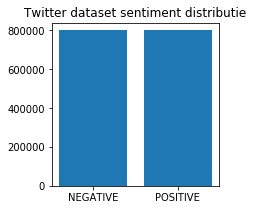

In [18]:
from collections import Counter

target_count = Counter(twitter_df.target)

plt.figure(figsize=(3,3))
plt.bar(target_count.keys(), target_count.values())
plt.title("Twitter dataset sentiment distributie")

#### Data Preprocessing - Twitter Sentiment Analysis Dataset

Om de tekst van de tweets bruikbaar te maken gaan we een analoge processing toepassen als bij de consumer complaint narrative.

Hierbij gaan we als volgt te werk:
1. Verwijder alle gebruikersnamen (@...), URL's en overbodige whitespace
2. Verwijder alle stopwoorden
3. Optioneel: converteer alle woorden naar hun stamvorm (we hebben vastgesteld dat dit echter slechtere resultaten geeft voor het model)

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\woute\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def twitter_processing(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [26]:
%%time

import swifter

twitter_df['tokens'] = twitter_df['text'].swifter.apply(twitter_processing)


Wall time: 38.3 s


In [27]:
twitter_df

,target,text,tokens
0,NEGATIVE,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,NEGATIVE,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,NEGATIVE,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,NEGATIVE,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,NEGATIVE,"@nationwideclass no, it's not behaving at all....",behaving mad see
...,...,...,...
1599995,POSITIVE,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599996,POSITIVE,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interviews
1599997,POSITIVE,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask details
1599998,POSITIVE,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday boo alll time tupac amaru ...


#### Feature Extraction: Word2Vec - Twitter Sentiment Analysis Dataset

Om de features uit de tekst te halen gaan we een Word2Vec model ontwikkelen. Om nadien de accuraatheid te kunnen evalueren splitsen we de dataset op in een training (0.8) en test dataset (0.2). Er wordt een random state variabele ingesteld om consistente resultaten te krijgen bij het trainen en testen van het model.

In [28]:
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.8

df_train, df_test = train_test_split(twitter_df, test_size=1-TRAIN_SIZE, random_state=42)
print("Training dataset grootte:", df_train.shape)
print("Test dataset grootte:", df_test.shape)

Training dataset grootte: (1280000, 3)
Test dataset grootte: (320000, 3)


Word2Vec gaat de tweets omzetten naar 'word embeddings'. Dit is een vector representatie van de corpus van elke tweet. Deze woord vectoren kunnen in een vector ruimte voorgesteld worden waardoor het algoritme sterk gerelateerde woorden kan gaan detecteren op basis van hoe sterk de context van de woorden in de corpus van de documenten overeenkomt.

We beginnen met de training dataset in te lezen naar Word2Vec waardoor deze de documenten kan gebruiken om een vocabularium te genereren. We maken hier opnieuw gebruik van multithreading om het proces te versnellen.

In [29]:
# pip install gensim

In [30]:
import gensim
import multiprocessing
from gensim.models import Word2Vec

W2V_SIZE = 300
W2V_WINDOW = 7
W2V_MIN_COUNT = 10

w2v_model = Word2Vec(size=W2V_SIZE, window=W2V_WINDOW, min_count=W2V_MIN_COUNT, workers=multiprocessing.cpu_count())
documents = [_text.split() for _text in df_train.tokens] 
w2v_model.build_vocab(documents)

vocab = w2v_model.wv.vocab.keys()
print("Aantal woorden in vocabularium:", len(vocab))

Aantal woorden in vocabularium: 30369


Vervolgens gaan we het Word2Vec model gaan trainen op deze documenten. We gaan hiervoor 32 keer (epochs) doorheen de training dataset.

In [31]:
%%time

W2V_EPOCH = 32

w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Wall time: 2min 56s


(263129627, 295270528)

Om de werking van het Word2Vec model te illustreren, gaan we hier enkele gerelateerde woorden uitschrijven van een gegeven positief en negatief woord.

In [32]:
w2v_model.wv.most_similar("good")

[('great', 0.6949321627616882),
 ('bad', 0.5556972026824951),
 ('goood', 0.5408994555473328),
 ('gooood', 0.5163300037384033),
 ('nice', 0.496670126914978),
 ('rough', 0.4827740788459778),
 ('wonderful', 0.4776894152164459),
 ('goooooood', 0.47443002462387085),
 ('fantastic', 0.4577442705631256),
 ('shitty', 0.455949991941452)]

In [33]:
w2v_model.wv.most_similar("bad")

[('terrible', 0.5634722709655762),
 ('horrible', 0.5604308843612671),
 ('good', 0.5556972026824951),
 ('awful', 0.5326348543167114),
 ('shitty', 0.5082992315292358),
 ('crappy', 0.4417520761489868),
 ('like', 0.4400200843811035),
 ('worse', 0.4201677143573761),
 ('sad', 0.4091266095638275),
 ('worst', 0.4023205637931824)]

De gerelateerde woorden liggen vooral binnen dezelfde sentiment klasse. Toch valt het op dat er ook nog woorden uit de andere klasse als gerelateerd naar boven komen, dit is wel verwacht aangezien Word2Vec betekenis geeft aan de woorden op basis van de context en deze woorden vaak elkaar kunnen vervangen in dezelfde zin. Dit zou echter geen probleem mogen geven bij het trainen van ons neuraal netwerk aangezien dit slechts uitzonderingen zijn.

Als tweede illustratie gaan we vragen aan het model om het woord dat niet in het rijtje past eruit te filteren. Dit werkt ook goed.

In [34]:
w2v_model.wv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

#### Deep Learning Model - Twitter Sentiment Analysis Dataset

In [35]:
# pip install keras

In [36]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.tokens)

word_count = len(tokenizer.word_index) + 1
print("Totaal aantal woorden:", word_count)

Using TensorFlow backend.


Totaal aantal woorden: 290419


Om een neuraal netwerk te bekomen, moeten we nu de tokens van de tekst in sequenties gaan onderverdelen waarvan het totaal aantal karakters gelijk is aan het aantal input neuronen van de eerste laag van ons netwerk. We kiezen voor deze laag een input dimensie van 300 neuronen. Documenten die korter zijn dan 300 karakters worden hierbij aangevuld door padding toe te voegen. Ter info: de lengte van een tweet is maximaal 280 karakters, dus is hier een marge in rekening gebracht.

In [37]:
from keras.preprocessing.sequence import pad_sequences

SEQUENCE_LENGTH = 300

x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.tokens), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.tokens), maxlen=SEQUENCE_LENGTH)

De uitvoer van ons neuraal netwerk is de sentiment score en dit is een waarde tussen 0 en 1. Om de target (y) in te stellen moeten we deze gaan transformeren aan de hand van een LabelEncoder. Hiermee worden de waarden 'NEGATIVE' en 'POSITIVE' omgezet naar 0 of 1. Dit doen we zowel bij de targets van de training als bij de test dataset.

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)
x_test (320000, 300)
y_test (320000, 1)


Als we nu de waarden van de target gaan uitschrijven krijgen we inderdaad enkel nog de waarden 0 of 1.

In [39]:
print(y_train[:])

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


Om het Word2Vec model te gebruiken in ons neuraal netwerk gaan we als eerste laag een Embedding layer gebruiken. Deze laag representeert de bekomen matrix van ons Word2Vec model en heeft dus dezelfde dimensies. Deze laag is dan ook niet trainbaar aangezien deze al opvoorhand aan de hand van Word2Vec getraind is.

In [43]:
from keras.layers import Embedding

embedding_matrix = np.zeros((word_count, W2V_SIZE))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(word_count, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

(290419, 300)


Vervolgens gaan we ons neuraal netwerk gaan construeren. Het netwerk is opgebouwd uit 4 lagen:
1. **Embedding layer**: input laag, gebruikt voor het mappen van de Word2Vec word embeddings.
2. **Dropout layer**: deze laag zou het overfitten van het netwerk moeten reduceren doordat er willekeurig uitvoer van de vorige laag weggelaten wordt (regulariseren), op die manier verhinderen we dat het netwerk ongewenste patronen tussen de neuronen zou gaan leren.
3. **LSTM layer**: Long short-term memory laag heeft feedback verbindingen (terugkoppeling) met vorige lagen (wat niet het geval is bij standaard feed-forward netwerken), op die manier kunnen we sequenties van data (tekst) beter gaan verwerken. In deze laag wordt ook dropout toegepast om overfitting tegen te gaan.
4. **Dense layer**: output laag, deze laag is een dense laag met slechts 1 uitvoer paramater die de sentiment score gaat voorstellen. Als activatie functie gebruiken we een sigmoid functie waardoor de uitvoer tussen 0 en 1 ligt. Voor negatieve sentiment zal deze waarde dichter bij 0 liggen en voor positieve sentiment dichter bij 1.

In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          87125700  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


Vervolgens gaan we het model gaan compileren. Aangezien onze targets binair zijn (0 of 1) gaan we een binaire loss functie gaan gebruiken. Als optimizer gaan we het "Adam" algoritme gebruiken die een standaard learning rate van 0.001 heeft. Als metrics van het model willen we de accuracy weten.

In [45]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

Om inzicht te krijgen in de inwendige state van het model tijdens het trainen, gaan we enkele callbacks gaan toevoegen. Deze zullen periodiek enkele statistieken uitprinten en  parameters tunen (learning rate). Ook is het mogelijk om het trainen op die manier vroegtijdig te stoppen indien deze geen winst meer boekt.
- **ReduceLROnPlateau**: deze callback verlaagt de learning rate zodra de loss niet meer verandert.
- **EarlyStopping**: deze callback stopt de training wanneer de accuracy niet meer verbetert.

In [46]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0), EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

Nu gaan we het model effectief gaan trainen. Om dit proces te versnellen gaan we gebruik maken van de CUDA bibliotheek van Nvidia. Hiervoor hebben we de vereiste drivers geinstalleerd. Vervolgens testen we of tensorflow (waarrond Keras gebouwd is) effectief de grafische kaart gaat aanspreken.

In [47]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8228990236659688884,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6686252073
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12274349819508669817
 physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"]

Nu Keras gebruik kan maken van onze GPU gaan we het model gaan trainen op onze train dataset met de fit functie. We gaan 8 keer over de dataset gaan (epochs) en gebruiken een batch grootte van 1024. Dit blijkt een goede afweging te zijn tussen het vereiste geheugen om het model te trainen en de snelheid waarmee het model traint. Om de train dataset te valideren gaan we deze verder opsplitsen in een derde validatie dataset (0.10).

In [48]:
%%time

EPOCHS = 8
BATCH_SIZE = 1024

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, verbose=1, callbacks=callbacks)

Train on 1152000 samples, validate on 128000 samples
Epoch 1/8
1152000/1152000 [==============================] - 297s 257us/step - loss: 0.5084 - accuracy: 0.7472 - val_loss: 0.4659 - val_accuracy: 0.7787
Epoch 2/8
1152000/1152000 [==============================] - 296s 257us/step - loss: 0.4832 - accuracy: 0.7641 - val_loss: 0.4568 - val_accuracy: 0.7837
Epoch 3/8
1152000/1152000 [==============================] - 296s 257us/step - loss: 0.4759 - accuracy: 0.7694 - val_loss: 0.4534 - val_accuracy: 0.7862
Epoch 4/8
1152000/1152000 [==============================] - 296s 257us/step - loss: 0.4721 - accuracy: 0.7718 - val_loss: 0.4505 - val_accuracy: 0.7883
Epoch 5/8
1152000/1152000 [==============================] - 295s 256us/step - loss: 0.4694 - accuracy: 0.7737 - val_loss: 0.4482 - val_accuracy: 0.7895
Epoch 6/8
1152000/1152000 [==============================] - 296s 257us/step - loss: 0.4679 - accuracy: 0.7744 - val_loss: 0.4469 - val_accuracy: 0.7893
Epoch 7/8
1152000/1152000 [==

#### Model Evaluation - Twitter Sentiment Analysis Dataset

Nu we een getraind model hebben gaan we deze gaan evalueren. Dit gaan we doen door een evaluatie score te bepalen van ons model aan de hand van de test dataset.

In [49]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

print("Model accuracy:", score[1])
print("Model loss:", score[0])

320000/320000 [==============================] - 31s 96us/step
Model accuracy: 0.7908218502998352
Model loss: 0.4448554313659668


Vervolgens gaan we onderzoeken of er eventueel overfitting of underfitting gebeurd is. Hiervoor plotten we de accuracy en loss van het trainingsproces doorheen de verschillende epochs.

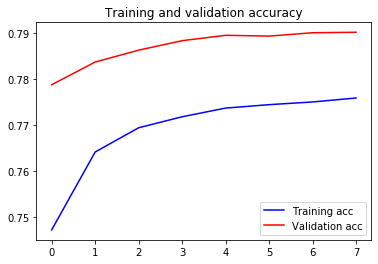

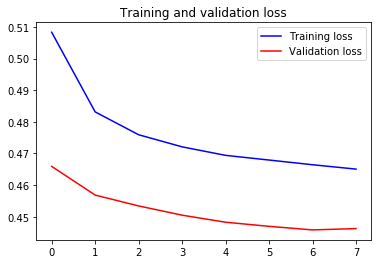

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training en validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training en validation loss')
plt.legend()
 
plt.show()

De accuracy en loss van de validatie dataset volgt een zeer gelijkaardig trainingsverloop als dat van de train dataset. We kunnen besluiten dat er geen overfitting of underfitting is gebeurd.

Om het model verder te gaan evalueren gaan we een confusion matrix construeren. Deze visualisatie geeft een goed beeld van hoe goed het model werkt.

320000/320000 [==============================] - 31s 96us/step


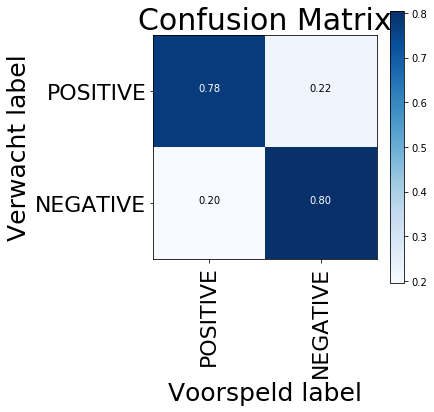

In [51]:
import itertools
from sklearn.metrics import confusion_matrix

def decode_sentiment(score):
    return "NEGATIVE" if score < 0.5 else "POSITIVE"

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('Verwacht label', fontsize=25)
    plt.xlabel('Voorspeld label', fontsize=25)

y_pred_1d = []    
y_test_1d = list(df_test.target)
    
scores = model.predict(x_test, verbose=1, batch_size=1024)
y_pred_1d = [decode_sentiment(score) for score in scores]
    
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)

plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion Matrix")
plt.show()

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.78      0.79    159494
    POSITIVE       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [53]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test_1d, y_pred_1d))

0.790821875


Nu we het model geëvalueerd hebben en we tevreden zijn met de behaalde accuracy, gaan we het model gaan exporteren zodat deze later opnieuw kan ingeladen worden. Dit is nuttig aangezien het trainen van het model heel wat tijd in beslag neemt en op die manier kan deze stap dus eenvoudig overgeslagen worden in de toekomst bij het verder ontwikkelen.

In [59]:
KERAS_MODEL = "../data/sentiment_analysis/model/model.h5"
WORD2VEC_MODEL = "../data/sentiment_analysis/model/model.w2v"

model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)

#### Predicting Complaints Sentiment

Nu kunnen we terug gaan naar onze Customer Complaint Dataset. Hier gaan we nu voor elke klacht een sentiment score gaan berekenen aan de hand van ons deep learning model. Deze score gaan we gaan toevoegen aan onze oorspronkelijke dataset zodat deze verder gebruikt kan worden om een classificatie model te ontwikkelen die antwoord kan geven op onze centrale onderzoeksvraag.

We laden eerst de opgeslagen modellen terug in het geheugen.

In [60]:
from keras.models import load_model 
from gensim.models import Word2Vec 

w2v_model = Word2Vec.load('../data/sentiment_analysis/model/model.w2v')
model = load_model('../data/sentiment_analysis/model/model.h5') 

Nu gaan we voor alle klachten de sentiment score gaan bepalen en deze vervolgens toevoegen aan de oorspronkelijke dataset. We gaan hiervoor de oorspronkelijke narrative gaan gebruiken aangezien dit betere resultaten blijkt te geven dan indien we de processed narrative zouden gebruiken. Dit heeft waarschijnlijk te maken met het feit dat we voor de processing op het Word2Vec model gekozen hebben om geen stemming te gebruiken aangezien dit een hogere accuracy gaf.

In [61]:
SEQUENCE_LENGTH = 300 

def predict(text):
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    score = model.predict([x_test])[0]
    return score[0]

In [67]:
import swifter

complaints_df['Sentiment_Score'] = complaints_df['Narrative'].swifter.apply(predict)

complaints_df

,Product,Narrative,Company,State,Response,Narrative_Processed,Sentiment_Score
0,"Credit reporting, repair, or other",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,complain time credit report experian inaccur j...,0.155694
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",FL,Closed with explanation,review current fraud account fraudul inquir,0.514699
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,Closed with explanation,call multipl time year debt occur previous mar...,0.303124
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",VA,Closed with explanation,send letter compani valid debt special ask att...,0.451214
4,"Credit reporting, repair, or other",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",PA,Closed with explanation,appli debt relief product account execut expla...,0.292630
...,...,...,...,...,...,...,...
485696,Debt collection,This account was a payday loan from the XXXX X...,Second Round Limited Partnership,ID,Closed,account payday loan year complet request loan ...,0.746436
485697,Mortgage,We had a mortgage with XXXX that was discharge...,"Seterus, Inc.",MD,Closed with explanation,mortgag discharg chapter bankruptci year ago c...,0.243441
485698,Consumer Loan,I have 2003 XXXX financed through United Auto ...,United PanAm Financial Corp.,TX,Closed with non-monetary relief,financ unit auto credit payment motor lock sei...,0.298219
485699,Consumer Loan,I was on automatic payment for my car loan. In...,NISSAN MOTOR ACCEPTANCE CORPORATION,IL,Closed with explanation,automat payment car loan fine print suppos fin...,0.109625


We geven de verdeling van de klachten weer in een histogram.

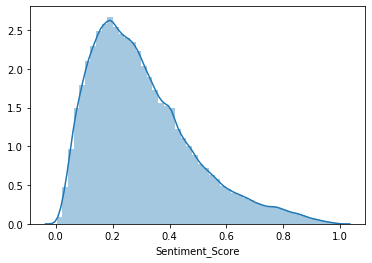

In [84]:
sns.distplot(complaints_df['Sentiment_Score'])

We kunnen hieruit duidelijk afleiden dat de klachten voornamelijk negatief zijn, wat dus ook te verwachten was van klachten. Dit bevestigd dat het model voor onze sentiment analyse naar behoren werkt.

We gaan nu deze verdeling eens verder gaan onderzoeken door een negatieve klacht en een "positieve" klacht te gaan uitlezen. We verdelen daarom de scores in meerdere kwantielen en lezen een klacht uit het eerste en laatste kwantiel uit.

In [133]:
complaints_quantile_df['Sentiment_Quantile'] = pd.qcut(complaints_df['Sentiment_Score'], q=[0, .2, .4, .6, .8, 1], labels=False, precision=0)

**Negatieve klacht:**

In [118]:
list(complaints_quantile_df[complaints_quantile_df['Sentiment_Quantile'].isin(['1'])].sample(1).Narrative)

["XXXX Getting a fraud alert doing something I do almost every day and for which there is supposed to be a note in my file. Citibank is marking my XXXX purchases as fraudulent. I buy a lot of books.almost every day because I read a, lot of books. 80 this year so far. So this is NOT unusual activity on my account. And when I called about it they wanted data I had already input. SS number, pin, account number, atm card and my password. Plus my mother 's maiden name. Only 2 of those should have been enough for something they never should have denied in the first place."]

**Positieve klacht:**

In [117]:
list(complaints_quantile_df[complaints_quantile_df['Sentiment_Quantile'].isin(['4'])].sample(1).Narrative)

['XXXX late fee. Paid in full on the due date as evidenced by receipt from other credit card company which paid this balance. Have since received another bill, with another late fee on top the late fee originally charged. this additional fee was now for {$26.00}. total bill now {$51.00} consisting of fees. I have spoken to citibank, to no avail. I feel these fees are incorrect and unjust and would like them removed.. My funds are limited, and hoping for your help in resolving this issue. Thank you.']

Nu we de sentiment score voor alle klachten bepaald hebben gaan we de volledige dataset gaan opslaan zodat deze later opnieuw kan ingeladen worden.

In [ ]:
complaints_df.to_csv('../data/complaints_with_sentiment_score.csv')

## Classificiation Model

Nu we alle predictors bepaald hebben kunnen we het classificatie model gaan ontwikkelen.

- X: features matrix construeren
    - sentiment score (0..1)
    - product (categorical): 1 hot transformation
    - response ratios (0..1) depending on company
- y: target vector construeren
    - reponse:
        - multi label classifications: label gebruiken
        - NN: 1 hot transformation

### Specification

- **Predictors**: Sentiment_Score, Product (13x), Response_Ratio (4x), Geolocation_Ratio (4x)
- **Target**: Company response to consumer
- **Sampling rate** (training/validation/testing): 60/20/20

### Feature Transformation & Label Encodings

## Conclusion

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Werkverdeling

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Notes

Om de opgeslagen dataset met de sentiment scores opnieuw in te laden gebruiken we de volgende functie. Dit is nuttig om de dataset opnieuw in het geheugen te krijgen zonder de voorgaande voorspellingen opnieuw te moeten uitvoeren.

In [ ]:
# read dataset with sentiment scores
complaints_sentiment_source_df = pd.read_csv('../data/complaints_with_sentiment_score.csv', delimiter=',')

# append sentiment score to original dataframe
complaints_df['Sentiment_Score'] = complaints_sentiment_source_df['Narrative sentiment score']
complaints_df

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

TODO
- eventueel dataset verder balanceren op basis van target group verdeling
- classifiers test experimenten uitvoeren (Naive Bayes, Decision Tree/Random Forest, SVM, NN)
    - inzicht geven van verdelingen bij zowel train/test sets
    - confusion matrix met concrete voorbeelden van correct geclassificeerde klachten